# ***Exact Cover solution based on Grover's Algorithm implementation***
---
Implementation of the exact cover encodings and circuit to solve a 2x2 sudoku and calculate the parameters of the circuit to solve a 9x9 sudoku.

In [2]:
import matplotlib.pyplot as plt
from python_package.exact_cover_encoding import ExactCoverEncoding
from python_package.exact_cover_circ import Exact_Cover_QCirc
from python_package.pattern_generation import pattern_generation
from pytket.circuit.display import render_circuit_jupyter as draw
from python_package.sudoku import Sudoku
from pytket.extensions.qiskit import AerBackend
from pytket.utils import probs_from_counts

## **2x2 Sudoku**

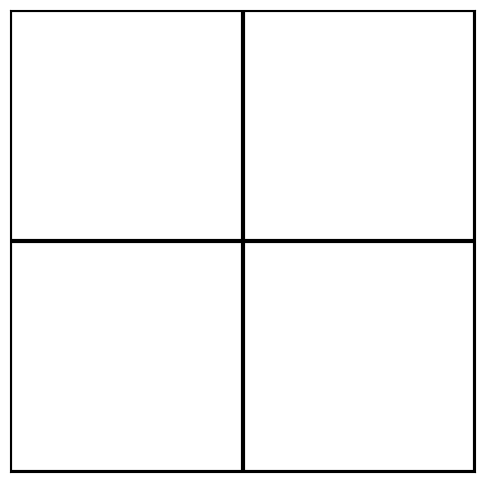

In [2]:
sudoku_2x2 = Sudoku("../../data/2x2sudoku-empty.csv")
sudoku_2x2.plot_grid()

In [3]:
open_tuples = [(0,0,1),(0,0,2),(0,1,1),(0,1,2),(1,0,1),(1,0,2),(1,1,1),(1,1,2)]
set_tuples = []

possible_patterns = {1:[[0,1],[1,0]],2:[[0,1],[1,0]]}

#### Encoding

In [4]:
# Initialize the encoding
encoding = ExactCoverEncoding(open_tuples,size = 1)

# Generate the universe set
encoding.gen_universe2x2()
encoding.universe2x2

[(0, 1),
 (1, 0),
 (1, 1),
 (0, 0),
 ('row', 0, 1),
 ('row', 0, 2),
 ('row', 1, 1),
 ('row', 1, 2),
 ('col', 0, 2),
 ('col', 1, 1),
 ('col', 1, 2),
 ('col', 0, 1)]

##### Simple encoding

In [5]:
S1 = encoding.gen_simple_subsets2x2()
S1

{'S_0': [(0, 0), ('row', 0, 1), ('col', 0, 1)],
 'S_1': [(0, 0), ('row', 0, 2), ('col', 0, 2)],
 'S_2': [(0, 1), ('row', 0, 1), ('col', 1, 1)],
 'S_3': [(0, 1), ('row', 0, 2), ('col', 1, 2)],
 'S_4': [(1, 0), ('row', 1, 1), ('col', 0, 1)],
 'S_5': [(1, 0), ('row', 1, 2), ('col', 0, 2)],
 'S_6': [(1, 1), ('row', 1, 1), ('col', 1, 1)],
 'S_7': [(1, 1), ('row', 1, 2), ('col', 1, 2)]}

In [6]:
ExactCover_simple = Exact_Cover_QCirc(encoding.universe2x2,S1,num_solutions=2)
ExactCover_simple.assemble_full_circuit_w_meas() # Build the circuit
draw(ExactCover_simple.main_circuit)

In [7]:
print("Total qubits count =", ExactCover_simple.main_circuit.n_qubits)
print("Total gate count =", ExactCover_simple.main_circuit.n_gates)

Total qubits count = 45
Total gate count = 268


##### Pattern encoding

In [8]:
S2 = encoding.gen_patterns_subsets2x2(possible_patterns,set_tuples)
S2

{'S_0': [(0, 0),
  ('row', 0, 1),
  ('col', 0, 1),
  (1, 1),
  ('row', 1, 1),
  ('col', 1, 1)],
 'S_1': [(1, 0),
  ('row', 1, 1),
  ('col', 0, 1),
  (0, 1),
  ('row', 0, 1),
  ('col', 1, 1)],
 'S_2': [(0, 0),
  ('row', 0, 2),
  ('col', 0, 2),
  (1, 1),
  ('row', 1, 2),
  ('col', 1, 2)],
 'S_3': [(1, 0),
  ('row', 1, 2),
  ('col', 0, 2),
  (0, 1),
  ('row', 0, 2),
  ('col', 1, 2)]}

In [1]:
ExactCover_patterns = Exact_Cover_QCirc(encoding.universe2x2,S2,num_solutions=2)
ExactCover_patterns.assemble_full_circuit_w_meas()
draw(ExactCover_patterns.main_circuit)

NameError: name 'Exact_Cover_QCirc' is not defined

In [10]:
print("Total qubits count =", ExactCover_patterns.main_circuit.n_qubits)
print("Total gate count =", ExactCover_patterns.main_circuit.n_gates)
print("Circuit depth =", ExactCover_patterns.main_circuit.depth())

Total qubits count = 29
Total gate count = 164
Circuit depth = 100


In [11]:
# Simulate the circuit (Warning: 29 qubits)

"""from pytket.passes import FlattenRegisters

backend = AerBackend()
flatten = FlattenRegisters()
flatten.apply(ExactCover_patterns.main_circuit)
compiled_circ = backend.get_compiled_circuit(ExactCover_patterns.main_circuit)

handle = backend.process_circuit(compiled_circ, n_shots=1)
counts = backend.get_result(handle).get_counts()"""

'from pytket.passes import FlattenRegisters\n\nbackend = AerBackend()\nflatten = FlattenRegisters()\nflatten.apply(ExactCover_patterns.main_circuit)\ncompiled_circ = backend.get_compiled_circuit(ExactCover_patterns.main_circuit)\n\nhandle = backend.process_circuit(compiled_circ, n_shots=1)\ncounts = backend.get_result(handle).get_counts()'

In [12]:
"""data = probs_from_counts(counts)

# Extract keys and values
keys = list(data.keys())
values = list(data.values())

# Convert keys to string representation for plotting
keys_str = [str(key) for key in keys]

# Create the bar plot
plt.figure(figsize=(7, 5))
plt.bar(keys_str, values, color='royalblue')

# Add title and labels
plt.title('Amplitudes')
plt.xlabel('states')
plt.ylabel('Amplitude')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()"""

"data = probs_from_counts(counts)\n\n# Extract keys and values\nkeys = list(data.keys())\nvalues = list(data.values())\n\n# Convert keys to string representation for plotting\nkeys_str = [str(key) for key in keys]\n\n# Create the bar plot\nplt.figure(figsize=(7, 5))\nplt.bar(keys_str, values, color='royalblue')\n\n# Add title and labels\nplt.title('Amplitudes')\nplt.xlabel('states')\nplt.ylabel('Amplitude')\n\n# Rotate x-axis labels for better readability\nplt.xticks(rotation=90)\n\n# Show the plot\nplt.tight_layout()\nplt.show()"

## **9x9 Sudoku**

#### Primitive

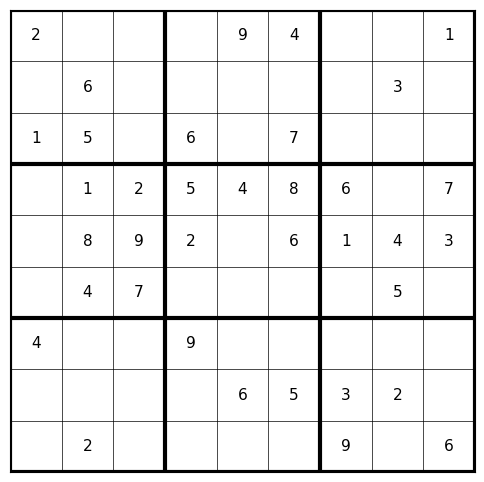

In [13]:
easy_sudoku_1 = Sudoku("../../data/easy2.csv")
easy_sudoku_1.plot_grid()

#### Preprocess

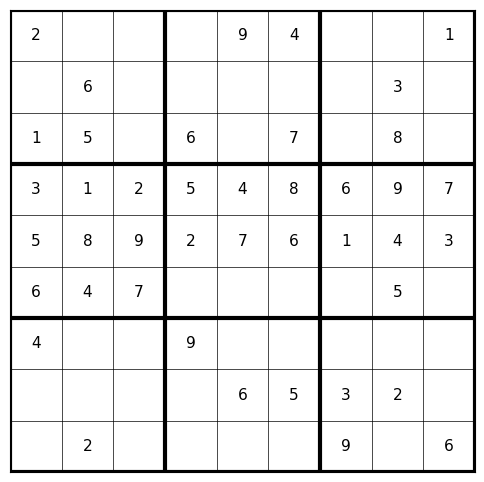

In [14]:
easy_sudoku_1.general_preprocessing()
easy_sudoku_1.general_preprocessing()
easy_sudoku_1.plot_grid()

#### Encoding

In [15]:
# Define open tuples and (pre)set tuples
easy_sudoku_1.convert_to_simple_open_tuples()
open_tuples = easy_sudoku_1.simple_open_tuples
easy_sudoku_1.convert_to_simple_set_tuples()
set_tuples = easy_sudoku_1.simple_set_tuples

In [16]:
# Initialize the encoding
encoding = ExactCoverEncoding(open_tuples,size = 3)

# Generate the universe set
encoding.gen_universe()
universe = encoding.universe
universe

[(5, 4),
 (8, 0),
 (0, 2),
 (8, 3),
 (2, 2),
 (1, 0),
 (1, 6),
 (1, 3),
 (2, 8),
 (6, 2),
 (7, 1),
 (6, 5),
 (6, 8),
 (5, 0),
 (5, 6),
 (5, 3),
 (8, 2),
 (8, 5),
 (0, 1),
 (0, 7),
 (2, 4),
 (1, 2),
 (2, 7),
 (1, 5),
 (6, 1),
 (1, 8),
 (7, 0),
 (6, 4),
 (7, 3),
 (6, 7),
 (5, 5),
 (8, 4),
 (5, 8),
 (8, 7),
 (0, 3),
 (1, 4),
 (0, 6),
 (2, 6),
 (7, 2),
 (6, 6),
 (7, 8),
 ('row', 0, 7),
 ('row', 2, 4),
 ('row', 5, 6),
 ('row', 6, 1),
 ('row', 5, 3),
 ('row', 5, 9),
 ('row', 7, 9),
 ('row', 6, 7),
 ('row', 1, 2),
 ('row', 1, 8),
 ('row', 1, 5),
 ('row', 8, 1),
 ('row', 8, 4),
 ('row', 0, 6),
 ('row', 8, 7),
 ('row', 0, 3),
 ('row', 2, 3),
 ('row', 2, 9),
 ('row', 5, 8),
 ('row', 5, 2),
 ('row', 6, 3),
 ('row', 7, 8),
 ('row', 6, 6),
 ('row', 1, 1),
 ('row', 1, 4),
 ('row', 1, 7),
 ('row', 8, 3),
 ('row', 0, 8),
 ('row', 0, 5),
 ('row', 2, 2),
 ('row', 5, 1),
 ('row', 2, 8),
 ('row', 7, 1),
 ('row', 6, 5),
 ('row', 7, 4),
 ('row', 6, 2),
 ('row', 6, 8),
 ('row', 7, 7),
 ('row', 1, 9),
 ('row'

##### Simple encoding

In [17]:
S = encoding.gen_simple_subsets()
S

{'S_0': [(0, 1), ('row', 0, 3), ('col', 1, 3), ('subgrid', 0, 0, 3)],
 'S_1': [(0, 1), ('row', 0, 7), ('col', 1, 7), ('subgrid', 0, 0, 7)],
 'S_2': [(0, 2), ('row', 0, 8), ('col', 2, 8), ('subgrid', 0, 0, 8)],
 'S_3': [(0, 2), ('row', 0, 3), ('col', 2, 3), ('subgrid', 0, 0, 3)],
 'S_4': [(0, 3), ('row', 0, 8), ('col', 3, 8), ('subgrid', 0, 3, 8)],
 'S_5': [(0, 3), ('row', 0, 3), ('col', 3, 3), ('subgrid', 0, 3, 3)],
 'S_6': [(0, 6), ('row', 0, 8), ('col', 6, 8), ('subgrid', 0, 6, 8)],
 'S_7': [(0, 6), ('row', 0, 5), ('col', 6, 5), ('subgrid', 0, 6, 5)],
 'S_8': [(0, 6), ('row', 0, 7), ('col', 6, 7), ('subgrid', 0, 6, 7)],
 'S_9': [(0, 7), ('row', 0, 8), ('col', 7, 8), ('subgrid', 0, 6, 8)],
 'S_10': [(0, 7), ('row', 0, 6), ('col', 7, 6), ('subgrid', 0, 6, 6)],
 'S_11': [(0, 7), ('row', 0, 7), ('col', 7, 7), ('subgrid', 0, 6, 7)],
 'S_12': [(1, 0), ('row', 1, 8), ('col', 0, 8), ('subgrid', 0, 0, 8)],
 'S_13': [(1, 0), ('row', 1, 9), ('col', 0, 9), ('subgrid', 0, 0, 9)],
 'S_14': [(1, 0)

In [18]:
# Initialize circuit

ExactCover = Exact_Cover_QCirc(universe,S,num_solutions=1)
ExactCover.assemble_full_circuit_w_meas() # Build the circuit
# draw(ExactCover.main_circuit)

In [19]:
print("Total qubits count =", ExactCover.main_circuit.n_qubits)
print("Total gate count =", ExactCover.main_circuit.n_gates)

Total qubits count = 2412
Total gate count = 31314


##### Pattern encoding

In [20]:
# Pattern generation
possible_patterns = pattern_generation(open_tuples,set_tuples,size=3).patterns
possible_patterns

{1: [[2, 3, 7, 1, 5, 6, 4, 8, 0],
  [2, 3, 7, 1, 5, 8, 4, 6, 0],
  [2, 3, 7, 1, 6, 5, 4, 8, 0],
  [2, 3, 7, 1, 8, 5, 4, 6, 0],
  [2, 3, 7, 5, 1, 6, 4, 8, 0],
  [2, 3, 7, 5, 1, 8, 4, 6, 0],
  [2, 3, 7, 5, 6, 1, 4, 8, 0],
  [2, 3, 7, 5, 8, 1, 4, 6, 0],
  [2, 3, 6, 7, 1, 5, 4, 8, 0],
  [2, 3, 8, 7, 1, 5, 4, 6, 0],
  [2, 3, 6, 7, 5, 1, 4, 8, 0],
  [2, 3, 8, 7, 5, 1, 4, 6, 0],
  [2, 3, 7, 8, 1, 5, 4, 6, 0],
  [2, 3, 7, 8, 5, 1, 4, 6, 0]],
 2: [[0, 8, 3, 4, 1, 6, 2, 7, 5],
  [0, 8, 3, 4, 1, 6, 5, 7, 2],
  [0, 8, 3, 4, 2, 6, 1, 7, 5],
  [0, 8, 3, 4, 2, 6, 5, 7, 1],
  [0, 8, 3, 4, 6, 1, 2, 7, 5],
  [0, 8, 3, 4, 6, 1, 5, 7, 2]],
 3: [[3, 0, 2, 5, 6, 8, 7, 1, 4],
  [3, 0, 2, 5, 8, 6, 7, 1, 4],
  [3, 0, 2, 8, 5, 6, 7, 1, 4],
  [3, 0, 2, 8, 6, 5, 7, 1, 4],
  [3, 0, 6, 5, 2, 8, 7, 1, 4],
  [3, 0, 6, 8, 2, 5, 7, 1, 4],
  [3, 0, 8, 5, 2, 6, 7, 1, 4],
  [3, 6, 0, 5, 2, 8, 7, 1, 4],
  [3, 6, 0, 8, 2, 5, 7, 1, 4],
  [3, 6, 2, 0, 5, 8, 7, 1, 4],
  [3, 6, 2, 0, 8, 5, 7, 1, 4],
  [3, 6, 8, 0, 2, 5, 7, 1, 4

In [21]:
S = encoding.gen_patterns_subsets(possible_patterns,set_tuples)
S

{'S_0': [(7, 2),
  ('row', 7, 1),
  ('col', 2, 1),
  ('subgrid', 6, 0, 1),
  (1, 3),
  ('row', 1, 1),
  ('col', 3, 1),
  ('subgrid', 0, 3, 1),
  (5, 4),
  ('row', 5, 1),
  ('col', 4, 1),
  ('subgrid', 3, 3, 1),
  (6, 5),
  ('row', 6, 1),
  ('col', 5, 1),
  ('subgrid', 6, 3, 1),
  (8, 7),
  ('row', 8, 1),
  ('col', 7, 1),
  ('subgrid', 6, 6, 1)],
 'S_1': [(7, 2),
  ('row', 7, 1),
  ('col', 2, 1),
  ('subgrid', 6, 0, 1),
  (1, 3),
  ('row', 1, 1),
  ('col', 3, 1),
  ('subgrid', 0, 3, 1),
  (5, 4),
  ('row', 5, 1),
  ('col', 4, 1),
  ('subgrid', 3, 3, 1),
  (8, 5),
  ('row', 8, 1),
  ('col', 5, 1),
  ('subgrid', 6, 3, 1),
  (6, 7),
  ('row', 6, 1),
  ('col', 7, 1),
  ('subgrid', 6, 6, 1)],
 'S_2': [(7, 2),
  ('row', 7, 1),
  ('col', 2, 1),
  ('subgrid', 6, 0, 1),
  (1, 3),
  ('row', 1, 1),
  ('col', 3, 1),
  ('subgrid', 0, 3, 1),
  (6, 4),
  ('row', 6, 1),
  ('col', 4, 1),
  ('subgrid', 6, 3, 1),
  (5, 5),
  ('row', 5, 1),
  ('col', 5, 1),
  ('subgrid', 3, 3, 1),
  (8, 7),
  ('row', 8, 1)

In [22]:
#Free some memory
import gc
del ExactCover
gc.collect()
# Initialize circuit
ExactCover = Exact_Cover_QCirc(universe,S,num_solutions=1)
ExactCover.assemble_full_circuit_w_meas() # Build the circuit
# draw(ExactCover_patterns.main_circuit)

In [ ]:
print("Total qubits count =", ExactCover.main_circuit.n_qubits)
print("Total gate count =", ExactCover.main_circuit.n_gates)

Total qubits count = 29
Total gate count = 164
